#                Ventas de Videojuegos 1980-2020

**Con el gran impacto que significó la evolución de la tecnogía en múltiples disciplinas, evidenciando grandes fuertes crecimientos en distintos Negocios, la industria de los videojuegos no ha sido una excepción a este movimiento.**

**Por ende, este proyecto tiene como objetivo estudiar esta evolución, contando como herramienta un dataframe, donde se dispone del nombre de los videosjuegos, año de su lanzamiento, plataforma, genero, compañia y la cantidad de venta según distintas zonas de Ventas, que son EEUU, Japón, Europa y el resto de los países.**

# Sección 1

**Comenzamos el proyecto poniendo a disposición las librerias necesarias, cargaremos el dataframe en cuestión y observaremos que tipo de datos disponemos.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Importamos el dataframe que utilizaremos*

*Renombramos las columnas, cambiandolas del ingles al español para una mejor comprensión*

In [3]:
df = pd.read_excel('C:/Users/ariel/Desktop/Data Sciencts/Data Sciencts/Desafíos con Python/Videojuego DS/vgsales.xlsx')
df.columns = ["Ranking","Nombre","Plataforma", "Año", "Genero",
                   "Editora", "EEUU_ventas", "Euro_ventas","Japon_ventas","Resto_pais_ventas","Ventas_global"]
df

,Ranking,Nombre,Plataforma,Año,Genero,Editora,EEUU_ventas,Euro_ventas,Japon_ventas,Resto_pais_ventas,Ventas_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


*Observamos que tipos de columnas disponemos*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            16598 non-null  int64  
 1   Nombre             16598 non-null  object 
 2   Plataforma         16572 non-null  object 
 3   Año                16301 non-null  float64
 4   Genero             16572 non-null  object 
 5   Editora            16514 non-null  object 
 6   EEUU_ventas        16572 non-null  float64
 7   Euro_ventas        16572 non-null  float64
 8   Japon_ventas       16572 non-null  float64
 9   Resto_pais_ventas  16572 non-null  float64
 10  Ventas_global      16572 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*Observamos las estadísticas descriptivas de cada columna* 

In [5]:
df.describe()

,Ranking,Año,EEUU_ventas,Euro_ventas,Japon_ventas,Resto_pais_ventas,Ventas_global
count,16598.000000,16301.000000,16572.000000,16572.000000,16572.000000,16572.000000,16572.000000
mean,8300.605254,2006.396847,0.265071,0.146872,0.077843,0.048132,0.538194
std,4791.853933,5.828025,0.817260,0.505716,0.309525,0.188728,1.556130
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Sección 2

**En esta sección, nos plantearemos preguntas y trataremos de responderlas a partir de visuializaciones**

**Cómo evolucionaron el lanzamiento en los distintos años y las ventas que tuvieron?**

Observamos que las ventas han ido evolucionando, siendo el intervalo de los años 2005-2010, donde se han registrados los mayores picos de ventas, pero en los ultimos años esta tendencia ha bajado

Text(0, 0.5, 'Ventas')

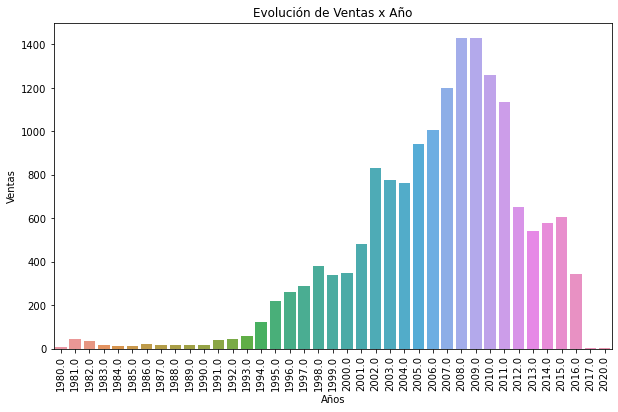

In [6]:
year_trend = df.Año.value_counts().to_frame().reset_index().rename(columns={'index': 'Año', 'Año':'Count'})
year_trend.head()
plt.figure(figsize = (10, 6))
sns.barplot(data = year_trend, x = 'Año', y = 'Count')
plt.xticks(rotation=90);
plt.title("Evolución de Ventas x Año")
plt.xlabel("Años")
plt.ylabel("Ventas")

**Cómo evolucionaron las ventas de los videojuegos(según su año de lanzamineto) con respecto a las regiones?**

*EEUU, Japón, Europa, Resto de páises

*las gráficas demuestran una cierta similitud con las ventas globales, con la excepción de que en Japón se presenta una mayor participación de ventas de videojuegos lanzados en la década de los 90´s

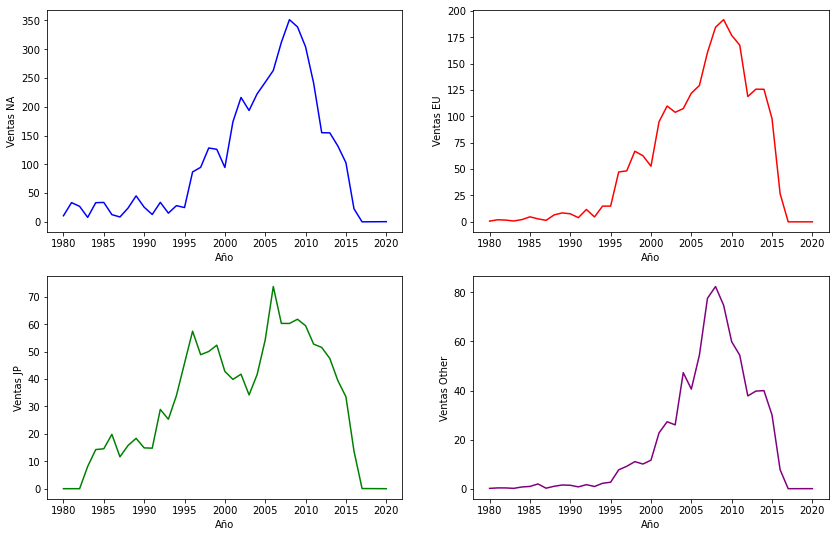

In [7]:
df = df.sort_values(by='Año', ascending=True)

ventas_año=list(df.Año.unique())
america=[]
europa=[]
japon=[]
otros=[]

for i in ventas_año:
    val=df[df.Año==i]
    america.append(val.EEUU_ventas.sum())
    europa.append(val.Euro_ventas.sum())
    japon.append(val.Japon_ventas.sum())
    otros.append(val.Resto_pais_ventas.sum())

d2 = pd.DataFrame({'Año': ventas_año, 'EEUU_ventas': america, 'Euro_ventas': europa, 'Japon_ventas': japon, 'Resto_pais_ventas': otros})
    
fig, ax = plt.subplots(2,2,figsize=(14,9))
ax[0,0].plot(d2['Año'], d2['EEUU_ventas'], color='blue')
ax[0,1].plot(d2['Año'], d2['Euro_ventas'], color='red')
ax[1,0].plot(d2['Año'], d2['Japon_ventas'], color='green')
ax[1,1].plot(d2['Año'], d2['Resto_pais_ventas'], color='purple')

ax[0,0].set_xlabel('Año')
ax[0,1].set_xlabel('Año')
ax[1,0].set_xlabel('Año')
ax[1,1].set_xlabel('Año')

ax[0,0].set_ylabel('Ventas NA')
ax[0,1].set_ylabel('Ventas EU')
ax[1,0].set_ylabel('Ventas JP')
ax[1,1].set_ylabel('Ventas Other')

plt.show()

**Cuales fueron los 20 videojuegos más vendidos?**

*Los resultados obtenidos, nos demuestran que la mayoria de los videojuegos han sido publicados por la editorial "Nintendo", registrando esta compañía en el año 2006 un ingreso global de 82,74 millones de dólares por su videojuego de "Wii Sport", otorgando a este año el mayor nivel de ventas en la historia.*

In [8]:
top20_videojuegos = df[df['Ranking'] <= 20]

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()
source= ColumnDataSource(top20_videojuegos)
hover= HoverTool(tooltips=[('Nombre','@Nombre'),('Ranking','@Ranking'),('Ventas','@Ventas_global'),('Editora', '@Editora')])

plot = figure(tools=[hover, 'crosshair'], x_axis_label='Año', y_axis_label='Ventas Globales',y_axis_type='linear', title='Top 20 mejores ventas videojuegos')
plot.add_tools(hover)
plot.line(x='Año', y='Ventas_global', line_width=3, line_color='blue', source=source )
plot.circle(x='Año', y='Ventas_global', size=5, source=source, color='purple' )

show(plot)

Loading BokehJS ...

**Que géneros han participado en más ventas?

*Con un histograma visualizamos que, el género más vendido fue el de acción, seguido el de deporte.*

[Text(0, 0.5, 'Ventas')]

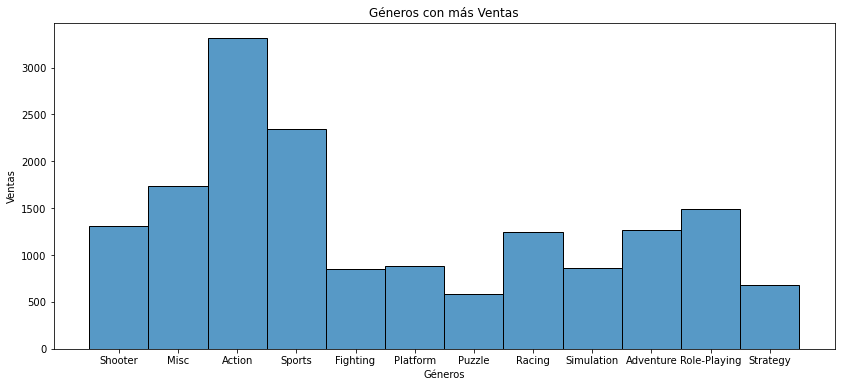

In [12]:
plt_1 = plt.figure(figsize=(14,6))
d2 = sns.histplot(data=df, x="Genero")
d2.set(title = "Géneros con más Ventas")
d2.set(xlabel = "Géneros")
d2.set(ylabel = "Ventas")

**Cuales fueron los géneros más vendidos en la plataforma xbox 360?.**


,Ranking,Nombre,Plataforma,Año,Genero,Editora,EEUU_ventas,Euro_ventas,Japon_ventas,Resto_pais_ventas,Ventas_global
7590,7592,Ridge Racer 6,X360,2005.0,Racing,Namco Bandai Games,0.10,0.02,0.07,0.01,0.20
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
7027,7029,NBA 2K6,X360,2005.0,Action,Take-Two Interactive,0.21,0.01,0.00,0.02,0.23
10652,10654,NHL 2K6,X360,2005.0,Sports,Take-Two Interactive,0.09,0.00,0.00,0.01,0.10
5776,5778,Tiger Woods PGA Tour 06,X360,2005.0,Sports,Electronic Arts,0.28,0.00,0.00,0.02,0.31


(1259, 11)


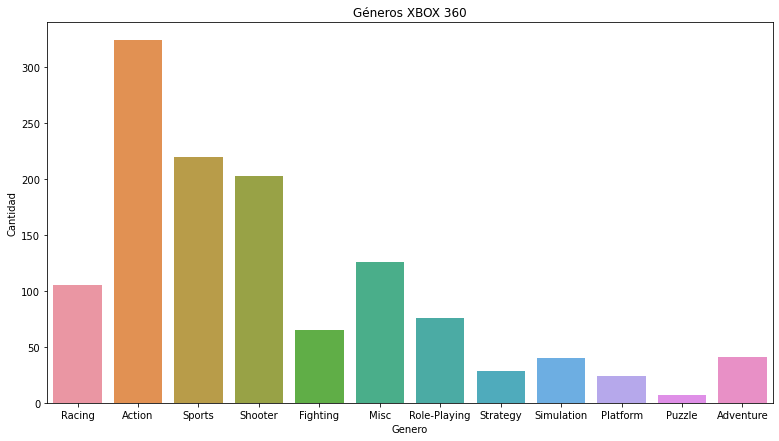

In [9]:
xbox_360 = df[(df.Plataforma == 'X360')]
xbox_360.Genero.unique()
display(xbox_360.head())
print(xbox_360.shape)

plt.figure(figsize=(13,7))
sns.countplot(x='Genero', data=xbox_360)
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.title('Géneros XBOX 360')
plt.show()

# Sección 3

# Regresión Lineal

**En este apartado, empezaremos a abordar conceptos estadíticos para una mejor comprensión de nuestro proyecto**

*Con el heatmap, observamos que existe una fuerte correlación en las ventas realizadas en EEUU y Europa* 

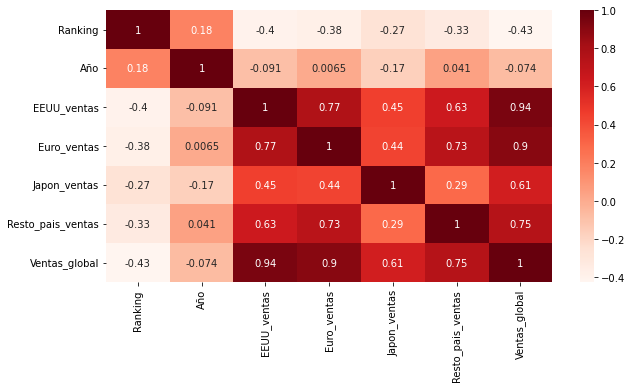

In [10]:
correlacion= df.corr()

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(correlacion,annot=True, cmap= 'Reds')
plt.show()

**A través de la librería statsmodels observamos que si se suman los valores las ventas realizadas en EEUU y Europa, la correlación en más notoria**

In [11]:
import statsmodels.formula.api as smf
model = smf.ols('Ventas_global ~ Euro_ventas + EEUU_ventas', data = df)#Dependiente ~ Independiente
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Ventas_global   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.271e+05
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:31:27   Log-Likelihood:                -3111.7
No. Observations:               16572   AIC:                             6229.
Df Residuals:                   16569   BIC:                             6253.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0349      0.002     14.615      

In [15]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import plotly.express as px
import plotly.graph_objects as go

In [21]:
data = df.query("Año>=2000 and Año <=2016")

In [22]:
temp = data.pivot_table(values='Ventas_global', index='Año', columns='Plataforma',
                        aggfunc='sum').fillna(0).reset_index()
temp_ = data.groupby(['Año', 'Plataforma'])['Ventas_global'].sum().reset_index()
t = temp_.groupby(['Año'])['Ventas_global'].nlargest(10).reset_index().level_1.values
order = temp_.iloc[t]['Plataforma'].unique()
colors = sns.color_palette("Spectral", len(temp.columns)-1)

In [24]:
fig = []
for i, col in enumerate(order):
    fig.append(go.Bar(name=col, x=temp['Año'], y=temp[col],
                      text=col, marker_color='rgb'+str(colors[i])))
figs = go.Figure(fig)
figs.update_layout(barmode='stack', height=600,
                   margin=dict(l=10, r=0, t=40, b=20),
                   title="VENTAS X PLATAFORMA (2000~2016)",
                   yaxis_title="Total de Ventas (million)")
figs.show()

In [31]:
ventas = [col for col in data.columns if col.endswith('Sales') and not col.startswith('Total')]
genero_ventas = data.groupby(['Genero'])[sales].sum()

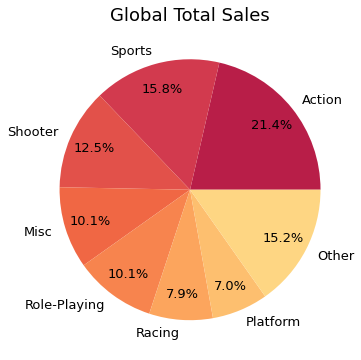

In [39]:
venta_total_genero = (data.groupby(['Genero'])['Ventas_global'].sum()
                      .sort_values(ascending=False))
fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')
ax.pie(np.append(venta_total_genero.values[:7], 
                 sum(venta_total_genero.values)-sum(venta_total_genero.values[:7])), 
       labels=np.append(venta_total_genero.index[:7], 'Other'),
       autopct='%.1f%%', colors=colors,
       pctdistance=0.8,
       textprops={'fontsize': 13}
      )
plt.title("Global Total Sales", fontsize=18)
plt.show()